### 278k Emotion Labeled Spotify Songs(Moodify) EDA 
Link to Dataset: (https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset)

The main idea of Moodify project is to classify songs not only based on their lyrical and musical features, but also incorporating emotions, in order to provide users with more successful recommendation outputs. Moodify aims to categorize songs into four main emotions and utilize the similarities in musical features within these categories to offer users more effective recommendations, weighting them with emotions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load 278k Emotion Labled Spotify Songs Dataset
elss_df = pd.read_csv('../data/278k_labelled_uri.csv')
useless_col = ['Unnamed: 0', 'Unnamed: 0.1']
elss_df = elss_df.drop(columns=useless_col)
elss_df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [ ]:
elss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
 12  uri               277938 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 27.6+ MB


#### Song Durations

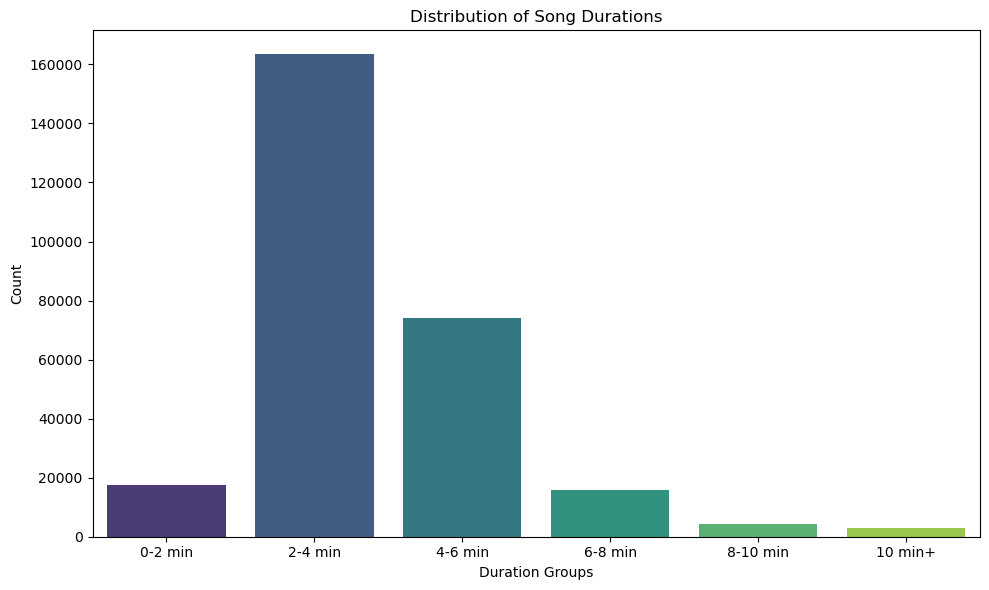

In [ ]:
def format_duration(seconds):
    minutes, seconds = divmod(seconds, 60)
    return f"{int(minutes)}:{int(seconds):02d}"

# Add new duration variables to df for visualization
elss_df['duration (sec)'] = elss_df['duration (ms)'] / 1000
elss_df['duration (min)'] = elss_df['duration (sec)'] / 60
elss_df['duration (min:sec)'] = elss_df['duration (sec)'].apply(format_duration)


bins = [0, 120, 240, 360, 480, 600, elss_df['duration (sec)'].max()] 
labels = ['0-2 min', '2-4 min', '4-6 min', '6-8 min', '8-10 min', '10 min+']

# Create a new column with duration groups
elss_df['duration groups'] = pd.cut(elss_df['duration (sec)'], bins=bins, labels=labels)

# Bar chart of duration groups
plt.figure(figsize=(10, 6))
sns.countplot(x='duration groups', data=elss_df, palette='viridis')

plt.title('Distribution of Song Durations')
plt.xlabel('Duration Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Most songs between 2-4 minutes, followed by 4-6 mins. Max song duration of around an hour. 

#### Audio Attributes

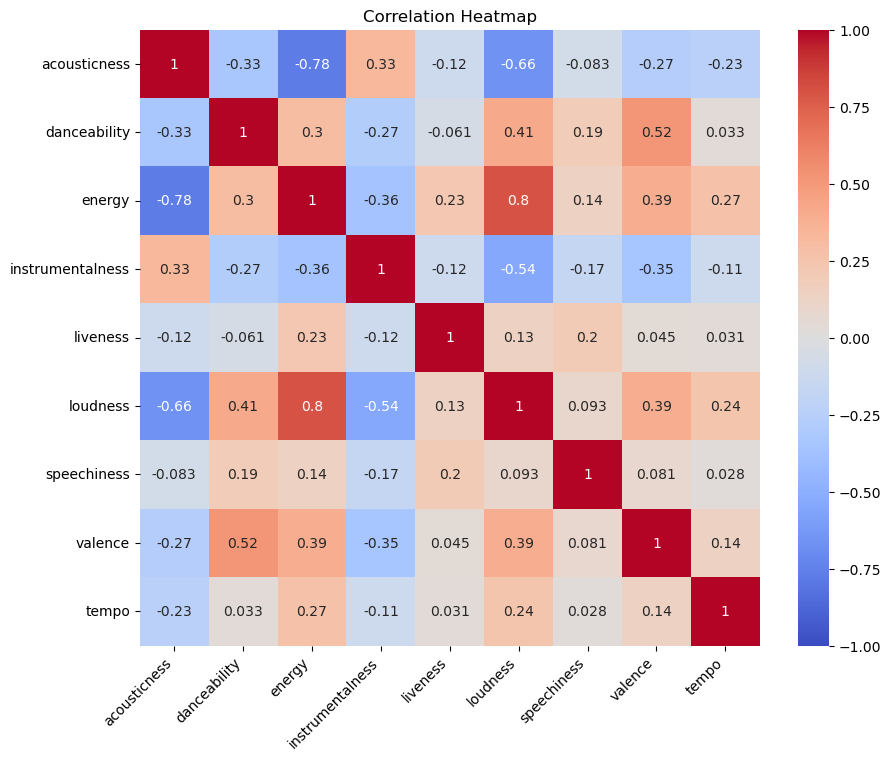

In [ ]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
# Create cor matrix of audio features
corr_matrix = elss_df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
plt.show()

Negative correlation between energy and acousticness as well as loudness and acousticness. High correlation between loudness and energy.

#### Emotional Attribution

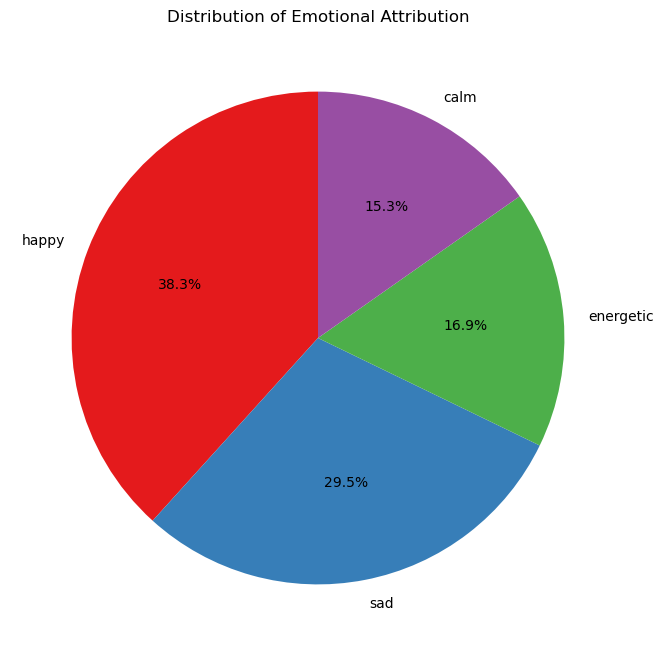

In [ ]:
# Create mapping and col for the corresponding emotions
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}
elss_df['emotion'] = elss_df['labels'].map(label_mapping)
emotion_counts = elss_df['emotion'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title('Distribution of Emotional Attribution')
plt.show()

About two-thirds of the tracks are labeled as happy or sad. 